<a href="https://colab.research.google.com/github/tidaltamu/workshops/blob/main/advanced/workshop4/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Layers

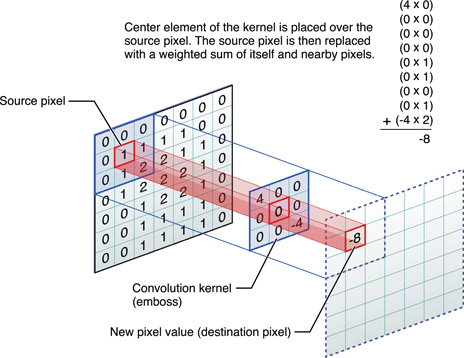

Source: https://www.kaggle.com/pouryaayria/convolutional-neural-networks-tutorial-tensorflow

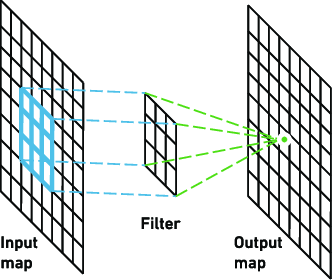

Source: https://www.researchgate.net/figure/Outline-of-the-convolutional-layer_fig1_323792694

### Pooling

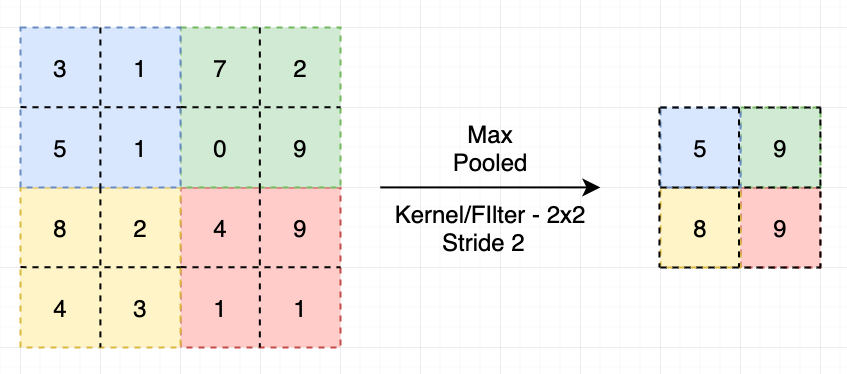

Source: https://ai.plainenglish.io/pooling-layer-beginner-to-intermediate-fa0dbdce80eb

In [ ]:
!pip install Pillow

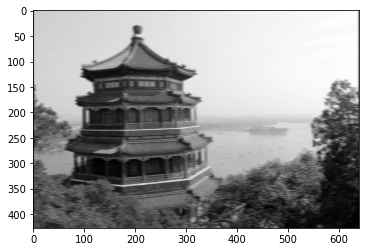

In [ ]:
from sklearn.datasets import load_sample_image 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load sample images 
china = load_sample_image("china.jpg") / 255 

flower = load_sample_image("flower.jpg") / 255 
images = np.array([ china, flower]) 

batch_size, height, width, channels = images.shape 

# Create 2 filters 
filters = np.zeros( shape =( 7, 7, channels, 2), dtype = np.float32) 

filters[:, 3, :, 0] = 1   # vertical line 
filters[ 3, :, :, 1] = 1  # horizontal line 

outputs = tf.nn.conv2d( images, filters, strides = 1, padding ="SAME") 

plt.imshow( outputs[ 0, :, :, 1], cmap ="gray") 

# plot 1st image's 2nd feature map 
plt.show()



### MNIST Example

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
  keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
  # keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='relu'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = [" T-shirt/ top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

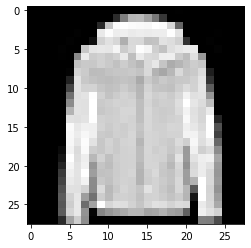

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='sgd',
#               metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [ ]:
# class_names = [" T-shirt/ top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 298). O'Reilly Media. Kindle Edition. 

In [ ]:
# model with double the filters for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  print(trainX.shape)
  valX, trainX = trainX[:5000], trainX[5000:]
  valY, trainY = trainY[:5000], trainY[5000:]


  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  valX = valX.reshape((valX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # one hot encode target values
  trainY = to_categorical(trainY)
  valY = to_categorical(valY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY, valX, valY

# scale pixels
def prep_pixels(train, test, val):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  val_norm = val.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  val_norm = val_norm / 255.0
  # return normalized images
  return train_norm, test_norm, val_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
# run_test_harness()

In [ ]:
trainX, trainY, testX, testY, valX, valY = load_dataset()
trainX, testX, valX = prep_pixels(trainX, testX, valX)

(60000, 28, 28)


Note: Make sure to change runtime to GPU

In [ ]:
model = keras.models.Sequential([
  keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
  # keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='relu'),
])

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model = keras.models.Sequential([
  keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='relu'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(valX, valY))
history = model.fit(trainX, trainY, epochs=100, validation_data=(valX, valY))

Epoch 1/100


InvalidArgumentError: ignored